# PLEIADES Tutorial - SAMMY Exercise EX012: Treating Multiple Nuclides in a Sample

## Overview

This notebook provides a comprehensive guide to SAMMY Exercise EX012 from the PLEIADES examples.
The exercise demonstrates how to handle samples containing multiple nuclides, a scenario frequently encountered in real-world experiments.
By leveraging PLEIADES, users will learn to configure, execute, and analyze SAMMY runs for such complex cases.

### Objectives

- Understand how to use PLEIADES to manage SAMMY runs for samples with multiple nuclides.
- Learn to define spin groups, resonance parameters, and nuclide abundances.
- Explore the impact of individual isotopes or spin groups on the overall sample.
- Refine resonance parameters and nuclide abundances to improve the fit to experimental data.

### Key Details

1. **Using PLEIADES**:
    - This notebook demonstrates the step-by-step process of setting up and executing SAMMY runs using PLEIADES.
    - It includes configuring the environment, setting up necessary files, running SAMMY, and analyzing the results.

2. **Handling Multiple Nuclides**:
    - The exercise focuses on treating samples with multiple isotopes or contaminants.
    - Users will learn to exclude specific spin groups and analyze their contributions to the overall sample.

3. **Practical Insights**:
    - Gain insights into how resonance parameters and spin groups influence experimental results.
    - Experiment with different configurations to understand the behavior of the sample.

### Instructions

Follow the steps in this notebook to configure the SAMMY environment, setup the required files, and execute the SAMMY runs.
Analyze the results to refine nuclide abundances and resonance parameters.
Experiment with excluding specific spin groups to observe their individual contributions and deepen your understanding of treating multiple nuclides in a sample.

## Step 0: First pass

We will create a workspace directory for the exercise and set up the necessary files.

In [1]:
from pathlib import Path

# Get current working directory (notebook location)
current_dir = Path.cwd()

# Create a dedicated sammy_workspaces folder for all runs
sammy_base_dir = current_dir / "workspaces"
sammy_base_dir.mkdir(exist_ok=True)
# Create a timestamped working directory within our persistent folder
base_dir_name = "Si_Transmission"
working_dir = sammy_base_dir / base_dir_name
output_dir = working_dir / "results"

# Create the directories if they do not exist
working_dir.mkdir(parents=True, exist_ok=True)
output_dir.mkdir(parents=True, exist_ok=True)

We will be using the `ex012` example files for this tutorial, so let's specify the path to the source file directory

In [2]:
source_dir = current_dir / "../samexm/ex012/"

# let's list the tree of the source directory
def list_tree(startpath: Path, prefix: str = ""):
    """Recursively print a tree structure of the directory like `tree` command."""
    entries = sorted(startpath.iterdir(), key=lambda x: (not x.is_dir(), x.name.lower()))
    entries_count = len(entries)

    for index, path in enumerate(entries):
        connector = "└── " if index == entries_count - 1 else "├── "
        print(prefix + connector + path.name)

        if path.is_dir():
            extension = "    " if index == entries_count - 1 else "│   "
            list_tree(path, prefix + extension)

print("Source directory tree:")
list_tree(source_dir)

Source directory tree:
├── ex012a
├── ex012a.dat
├── ex012a.inp
├── ex012a.par
└── README.FIRST


Now that we verify the files needed for the exercise are in place, we can proceed to setup a runner with `pleiades`.

In [3]:
from pleiades.sammy.factory import SammyFactory

runner = SammyFactory.create_runner(
    backend_type="local",
    working_dir=working_dir,
    output_dir=output_dir,
)

runner

2025-05-19 14:58:43 | DEBUG    | pleiades.sammy.factory:list_available_backends:76 - Local SAMMY found at: /Users/8cz/code.ornl.gov/SAMMY/build/bin/sammy
2025-05-19 14:58:43 | DEBUG    | pleiades.sammy.factory:list_available_backends:100 - NOVA credentials found


Here we are using the local runner for the exercise, but you should be able to adapt this to use other runners as needed.

The next step is to tell `pleiades` where the start input files are:

- **Input File**: `ex012a.inp` - Defines spin groups for different isotopes.
- **Parameter File**: `ex012a.par` - Contains resonance data grouped by nuclide.
- **Data File**: `ex012a.dat` - Provides "real data" for transmission through natural silicon.

These files are essential for running the SAMMY exercise and analyzing the results.

In [4]:
from pleiades.sammy.interface import SammyFiles

files_step_0 = SammyFiles(
    input_file=source_dir / "ex012a.inp",
    parameter_file=source_dir / "ex012a.par",
    data_file=source_dir / "ex012a.dat",
)

Now let's pass the file to the runner to verify and setup.

In [5]:
runner.prepare_environment(files=files_step_0)

2025-05-19 14:58:46 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:44 - Validating input files
2025-05-19 14:58:46 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:48 - Moving files to working directory
2025-05-19 14:58:46 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:84 - Moving files to working directory: /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission
2025-05-19 14:58:46 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:100 - Copying input file: /Users/8cz/github.com/PLEIADES/examples/Notebooks/../samexm/ex012/ex012a.inp -> /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/ex012a.inp
2025-05-19 14:58:46 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:109 - Copying parameter file: /Users/8cz/github.com/PLEIADES/examples/Notebooks/../samexm/ex012/ex012a.par -> /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/ex012a.par
2025-05-19 14:58:46 | DE

In [6]:
# Print the configuration to verify
print("Runner configuration:")
print(f"Working directory: {runner.config.working_dir}")
print(f"Output directory: {runner.config.output_dir}")
print(f"SAMMY executable: {runner.config.sammy_executable}")

Runner configuration:
Working directory: /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission
Output directory: /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/results
SAMMY executable: /Users/8cz/code.ornl.gov/SAMMY/build/bin/sammy


The runner is configured and files are in place, time to run the first pass.

In [7]:
result = runner.execute_sammy(files_step_0)

2025-05-19 14:58:48 | INFO     | pleiades.sammy.backends.local:execute_sammy:62 - Starting SAMMY execution 3fb7f4bb-a3fd-4a49-b335-927d2befd792
2025-05-19 14:58:48 | DEBUG    | pleiades.sammy.backends.local:execute_sammy:63 - Working directory: /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission
2025-05-19 14:58:50 | INFO     | pleiades.sammy.backends.local:execute_sammy:93 - SAMMY execution completed successfully for 3fb7f4bb-a3fd-4a49-b335-927d2befd792


Now let's examine the results of the first pass, and move files to the appropriate location.

In [8]:
# Process results
if result.success:
    print(f"SAMMY execution successful (runtime: {result.runtime_seconds:.2f}s)")
    runner.collect_outputs(result)

else:
    print("SAMMY execution failed:")
    print(result.error_message)
    print("\nConsole output:")
    print(result.console_output)

2025-05-19 14:58:52 | INFO     | pleiades.sammy.interface:collect_outputs:306 - Collecting outputs for execution 3fb7f4bb-a3fd-4a49-b335-927d2befd792
2025-05-19 14:58:52 | DEBUG    | pleiades.sammy.interface:collect_outputs:317 - Found known output file: SAMMY.LPT
2025-05-19 14:58:52 | DEBUG    | pleiades.sammy.interface:collect_outputs:317 - Found known output file: SAMMY.IO
2025-05-19 14:58:52 | DEBUG    | pleiades.sammy.interface:collect_outputs:317 - Found known output file: SAMMY.LST
2025-05-19 14:58:52 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAM41.DAT
2025-05-19 14:58:52 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAM46.DAT
2025-05-19 14:58:52 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAMMY.ODF
2025-05-19 14:58:52 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAMMY.PAR
2025-05-19 14:58:52 | DEBU

SAMMY execution successful (runtime: 2.16s)


In [9]:
list_tree(working_dir)

├── results
│   ├── SAM41.DAT
│   ├── SAM46.DAT
│   ├── SAMMY.COV
│   ├── SAMMY.IO
│   ├── SAMMY.LPT
│   ├── SAMMY.LST
│   ├── SAMMY.ODF
│   ├── SAMMY.PAR
│   ├── SAMMY.PLT
│   └── SAMMY.RED
├── ex012a.dat
├── ex012a.inp
└── ex012a.par


### Load the run results of the fit. 

The results of the SAMMY fit will always be written out to a `SAMMY.LST` and a `SAMMY.LPT` file. These files were collected and moved to the `output_dir` when `collect_outputs()` was called. 

Here we utilize a `ResultsManager` class to load all of the relevant results from the run into a `RunResults` class. The `ResultsManager` will then call a `LptManager` and a `LstManager` to readin the result data and process it into the `RunResults` class

When a `ResultsManager` is initialized, you can either pass it the paths of the `SAMMY.LST` and `SAMMY.LPT` files
```
results_manager = ResultsManager(lpt_file_path=lpt_file_path, lst_file_path=lst_file_path)
```

Or if a ResultsManager already exists, then a `SAMMY.LST` and `SAMMY.LPT` file can be process with the utilizing process functions within `LptManager` and `LstManager`

In [10]:
from pleiades.sammy.results.manager import ResultsManager

# Define the paths to the LPT and LST files
lpt_file_path = output_dir / "SAMMY.LPT"
lst_file_path = output_dir / "SAMMY.LST"

results_manager = ResultsManager(lpt_file_path=lpt_file_path, lst_file_path=lst_file_path)

2025-05-19 14:59:02 | INFO     | pleiades.sammy.io.lpt_manager:process_lpt_file:466 - Successfully read the file: /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/results/SAMMY.LPT
2025-05-19 14:59:02 | DEBUG    | pleiades.sammy.io.lpt_manager:process_lpt_file:477 - Split LPT content into 3 blocks.
2025-05-19 14:59:02 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_isotope_info:116 - Extracting isotope information...
2025-05-19 14:59:02 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_radius_info:182 - Extracting radius information...
2025-05-19 14:59:02 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_broadening_info:248 - Extracting broadening information...
2025-05-19 14:59:02 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_normalization_info:315 - Extracting normalization information...
2025-05-19 14:59:02 | INFO     | pleiades.sammy.io.lpt_manager:extract_results_from_string:412 - Normalization results not found.
2025-05-19 14:59:02 | DEBUG   

### Print some of the Results

Here we can explore the `RunResults` class which aggregates multiple fit results and provides access to the data loaded from the `SAMMY.LST` file.

The following attributes of `RunResults` can be explored:
- **`fit_results`**: A list of `FitResults` objects containing the results of individual fits.
- **`data`**: A `sammyData` object containing the LST data loaded from the SAMMY `.LST` file.


In [11]:
# Print the number of fits
results_manager.print_number_of_fit_results()

# Print the final fit results
results_manager.print_fit_result(-1)

2025-05-19 14:59:05 | INFO     | pleiades.sammy.results.manager:print_number_of_fit_results:63 - Number of fit results: 3
2025-05-19 14:59:05 | INFO     | pleiades.sammy.results.manager:print_fit_result:56 - Fit Result -1:
{
  "nuclear_data": {
    "isotopes": [
      {
        "isotope_information": null,
        "abundance": 0.9327,
        "uncertainty": null,
        "vary_abundance": "VaryFlag.YES",
        "endf_library": "ENDF-B-VIII.0",
        "spin_groups": [
          1,
          2,
          3,
          4,
          5,
          6,
          7
        ],
        "resonances": [],
        "radius_parameters": [
          {
            "effective_radius": 4.13642,
            "true_radius": 4.13642,
            "channel_mode": null,
            "vary_effective": null,
            "vary_true": null,
            "spin_groups": [
              1,
              4,
              5
            ],
            "channels": null
          },
          {
            "effective_radius"

### Plot Results

In this section, we visualize the results of the SAMMY fit by plotting the experimental and theoretical cross sections as a function of energy. Additionally, we compute and plot the residuals (difference between experimental and theoretical cross sections) to assess the quality of the fit.

The main plot displays:
- Experimental cross section (data points).
- Final theoretical cross section (continuous line).

The residuals plot shows:
- The difference between experimental and theoretical cross sections.
- A horizontal line at zero to indicate perfect agreement.

These visualizations help evaluate the accuracy of the SAMMY fit and identify any discrepancies between the experimental data and the theoretical model.

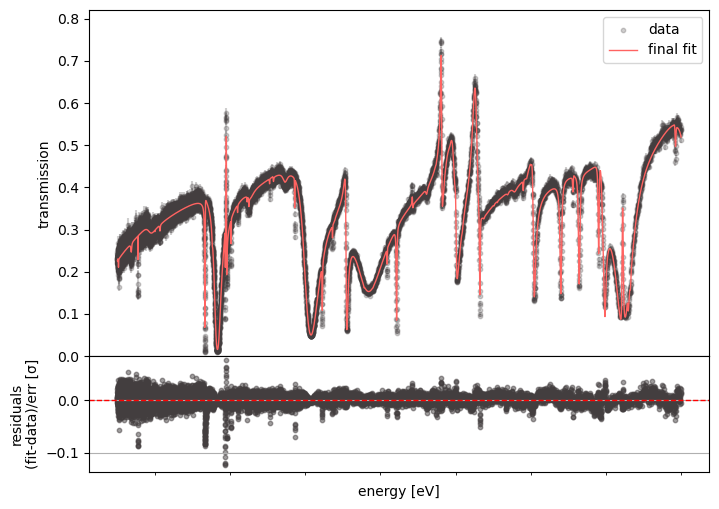

In [12]:
import matplotlib.pyplot as plt
from pleiades.sammy.results.plotter import plot_transmission

# --- Plot transmission and residuals ---
fig, ax = plot_transmission(results_manager.get_data(), residual=True)

#show the plot
plt.show()

## Generating Input Files with PLEIADES InpManager

Up to this point, we've been using pre-assembled input files for our SAMMY runs. Now, we'll demonstrate how to generate SAMMY input files programmatically using PLEIADES' InpManager class.

### Using InpManager for Fitting Mode

The InpManager class can generate properly formatted SAMMY input files for different modes of operation. For multi-isotope fitting scenarios like this silicon transmission experiment, we'll use the fitting mode configuration.

In [13]:
from pleiades.sammy.io.inp_manager import InpManager
from pleiades.sammy.fitting.options import FitOptions

# Create a directory to store our generated files
generated_dir = working_dir / "generated"
generated_dir.mkdir(exist_ok=True)

# Basic approach: Generate an input file for fitting mode using the factory method
fitting_inp_path = generated_dir / "generated_fitting.inp"
inp_path = InpManager.create_fitting_inp(
    output_path=fitting_inp_path,
    title="Silicon Transmission Fitting with Multiple Isotopes"
)

# Display the content of the generated file
print(f"Generated fitting input file: {inp_path}")
with open(inp_path, 'r') as f:
    print("\nContent of the generated fitting input file:")
    print("=" * 50)
    print(f.read())

2025-05-19 15:00:31 | INFO     | pleiades.sammy.io.inp_manager:write_inp_file:163 - Successfully wrote SAMMY input file to /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/generated/generated_fitting.inp


Generated fitting input file: /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/generated/generated_fitting.inp

Content of the generated fitting input file:
Silicon Transmission Fitting with Multiple Isotopes
# PLACEHOLDER: Replace with isotope information (name, mass, energy range)
REICH-MOORE FORMALISM IS WANTED
KEY-WORD PARTICLE-PAir definitions are given
QUANTUM NUMBERS ARE in parameter file
USE TWENTY SIGNIFICANT DIGITS
DO NOT DIVIDE DATA INTO REGIONS
BROADENING IS WANTED
SOLVE BAYES EQUATIONS
LET SAMMY CHOOSE WHICH INVERSION SCHEME TO USE
DO NOT PRINT ANY INPUT PARAMETERS
DO NOT PRINT INPUT DATA
DO NOT PRINT THEORETICAL VALUES
DO NOT PRINT PARTIAL DERIVATIVES
DO NOT SUPPRESS ANY INTERMEDIATE PRINTOUT
DO NOT USE SHORT FORMAT FOR OUTPUT
DO NOT PRINT REDUCED WIDTHS
DO NOT PRINT DEBUG INFO
CHI SQUARED IS WANTED
DO NOT PRINT WEIGHTED RESIDUALS
DO NOT PRINT BAYES WEIGHTED RESIDUALS
DO NOT PRINT PHASE SHIFTS
USE CENTER-OF-MASS CROSS SECTIONS
DO NOT ADD CONSTA

### Customizing FitOptions for Multi-Isotope Silicon

For more control, we can create a customized configuration with specific options for our silicon transmission experiment. This allows us to set specific options for multi-isotope fitting.

In [14]:
# Start with the base fitting options
custom_options = FitOptions.from_fitting_config()

# Customize for multi-isotope silicon transmission
# Here we can adjust specific options for our experiment

# For demonstration purposes, let's modify a few options
from pleiades.sammy.alphanumerics import (
    BroadeningOptions,
    MultipleScatteringCorrectionsOptions,
    CrossSectionOptions
)

# Set broadening options suitable for silicon transmission
custom_options.broadening = BroadeningOptions(
    broadening_is_wanted=True,
    doppler_broadening=True,
    resolution_broadening=True
)

# Enable multiple scattering corrections for transmission
custom_options.multiple_scattering = MultipleScatteringCorrectionsOptions(
    multiple_scattering_corrections=True,
    self_shielding_and_multiple_scattering=True
)

# Set cross section options for transmission
custom_options.cross_section = CrossSectionOptions(
    data_are_transmission=True,
    compute_cross_sections=True
)

# Create a custom InpManager with these options
custom_inp_path = generated_dir / "custom_si_fitting.inp"
custom_manager = InpManager(
    options=custom_options,
    title="Customized Silicon Transmission Fitting",
    isotope_info={"main_isotopes": ["Si-28", "Si-29", "Si-30"], "abundances": [0.9327, 0.038773, 0.021778]},
    physical_constants={"temperature": 300.0, "thickness": 0.34716},
    reaction_type="TRANSMISSION"
)

# Write the custom input file
custom_file_path = custom_manager.write_inp_file(custom_inp_path)

# Display the content of the customized file
print(f"Generated customized fitting input file: {custom_file_path}")
with open(custom_file_path, 'r') as f:
    print("\nContent of the customized fitting input file:")
    print("=" * 50)
    print(f.read())

2025-05-19 15:00:51 | INFO     | pleiades.sammy.io.inp_manager:write_inp_file:163 - Successfully wrote SAMMY input file to /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/generated/custom_si_fitting.inp


Generated customized fitting input file: /Users/8cz/github.com/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/generated/custom_si_fitting.inp

Content of the customized fitting input file:
Customized Silicon Transmission Fitting
# Actual isotope information would be formatted here
REICH-MOORE FORMALISM IS WANTED
KEY-WORD PARTICLE-PAir definitions are given
QUANTUM NUMBERS ARE in parameter file
USE TWENTY SIGNIFICANT DIGITS
DO NOT DIVIDE DATA INTO REGIONS
BROADENING IS WANTED
SOLVE BAYES EQUATIONS
LET SAMMY CHOOSE WHICH INVERSION SCHEME TO USE
DO NOT PRINT ANY INPUT PARAMETERS
DO NOT PRINT INPUT DATA
DO NOT PRINT THEORETICAL VALUES
DO NOT PRINT PARTIAL DERIVATIVES
DO NOT SUPPRESS ANY INTERMEDIATE PRINTOUT
DO NOT USE SHORT FORMAT FOR OUTPUT
DO NOT PRINT REDUCED WIDTHS
DO NOT PRINT DEBUG INFO
CHI SQUARED IS WANTED
DO NOT PRINT WEIGHTED RESIDUALS
DO NOT PRINT BAYES WEIGHTED RESIDUALS
DO NOT PRINT PHASE SHIFTS
USE CENTER-OF-MASS CROSS SECTIONS
DO NOT ADD CONSTANT TERM TO DATA COVARI